In [2]:
import matplotlib.pyplot as plt
import os
import json
import cv2
import torch
import copy
import numpy as np

In [3]:
class PLTPoltter():
    def __init__(self, ax_size, **kwargs):
        self.fig, self.ax = plt.subplots(*ax_size, **kwargs)

    def plt_show_cv2_img(self, cv2_img, ax_id):
        self.ax[ax_id].imshow(cv2_img[:, :, ::-1])

    def plt_show_np_single_channel(self, np_array, channel, ax_id):
        array = np_array[channel]
        self.ax[ax_id].imshow(array)

    def plt_show_np_concat(self, np_array, concat_num, ax_id):
        channel, height, wdith = np_array.shape
        concat = np.zeros((height, wdith))
        for c in range(concat_num):
            # print(np.max(np_array[c]))
            concat += np_array[c]
        self.ax[ax_id].imshow(concat)

{'img_height': 480, 'img_width': 640, 'hands': [{'joints': [[489.2594528198242, 327.4468517303467], [539.5664978027344, 298.3179473876953], [569.501953125, 256.3524627685547], [585.0559997558594, 213.9545774459839], [603.8775253295898, 183.6055612564087], [517.8127670288086, 208.9621353149414], [518.9309692382812, 151.49489879608154], [519.9046325683594, 117.1571159362793], [520.9226989746094, 88.7242841720581], [485.16857147216797, 210.17755508422852], [485.38124084472656, 149.94861602783203], [485.9113311767578, 110.28844356536865], [485.6597900390625, 79.77855205535889], [458.08361053466797, 220.3471040725708], [449.26025390625, 167.69654273986816], [444.25315856933594, 133.10093879699707], [441.2156677246094, 105.93066215515137], [437.8896713256836, 234.91413116455078], [428.2843017578125, 195.60198783874512], [422.85388946533203, 170.58640480041504], [419.376220703125, 147.43915557861328]]}]}


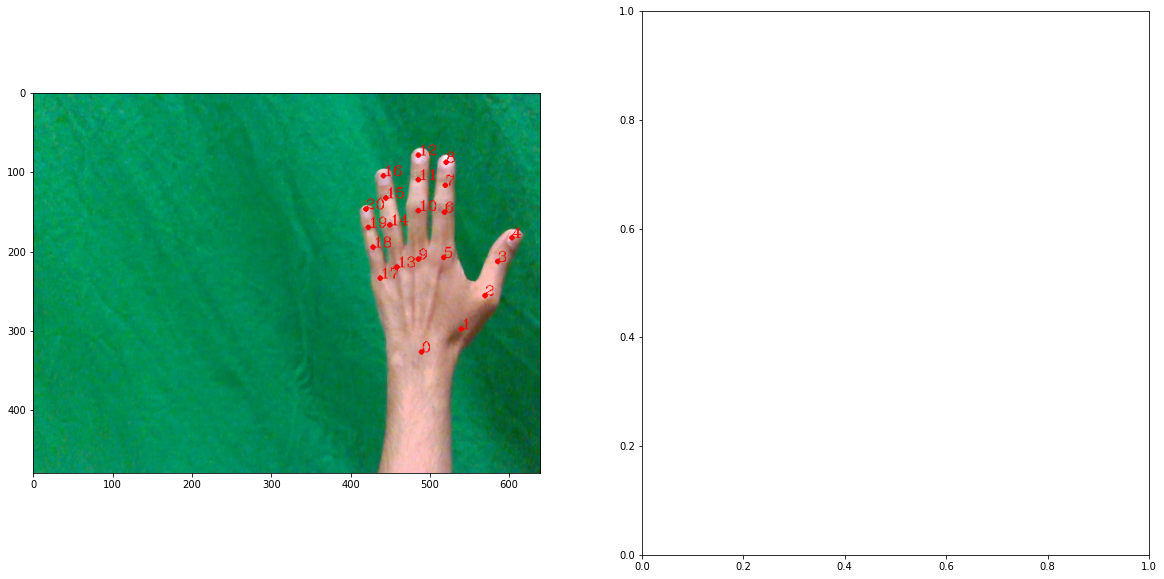

In [16]:
data_root = './data'
user_id = 'user01'
img_name = 'image_00010_color.png'

img_path = os.path.join(data_root, user_id, 'color', img_name)
json_path = os.path.join(data_root, user_id, 'mediapipe_anno', img_name.split('.')[0] + '.json')
full_img = cv2.imread(img_path)

with open(json_path, 'r') as f:
    anno_info = json.load(f)
print(anno_info)
hands = anno_info['hands']
for hand in hands:
    joints = hand['joints']
    for i, joint in enumerate(joints):
        x, y = joint
        cv2.circle(full_img, (int(x), int(y)), radius=2, color=(0, 0, 255), thickness=2)
        cv2.putText(full_img, str(i), (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX, 0.6, (0, 0, 255), 1)

plt_poltter = PLTPoltter(ax_size=(1, 2), figsize=(20, 10))
plt_poltter.plt_show_cv2_img(full_img, 0)   

